In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('task.csv')
data.head()

,x1,x2,x3,y
0,26.936784,93.051662,-57.724979,-103906.268958
1,25.882914,-15.956548,4.629428,36660.778731
2,72.325565,-36.363453,51.612948,52458.669419
3,25.721162,48.964314,-104.454286,281385.144662
4,-65.889293,-23.420170,-19.125384,-199078.713629


In [18]:
def regression(X, y):
    X = np.hstack((X,np.ones((1,X.shape[0])).T))
    W_inv = np.linalg.inv(X.T @ X)
    return W_inv@X.T@y

In [19]:
X,y = data.drop('y', axis = 1).values, data['y'].values

In [21]:
answ = regression(X,y)

In [26]:
coefs, intercept = answ[:-1], answ[-1]
coefs, intercept

(array([ 717.41146317,   54.0762867 , 1069.58945972]), 122927.77385685255)

In [23]:
linear = LinearRegression()

In [25]:
linear.fit(X,y)
linear.coef_, linear.intercept_

(array([ 717.41146317,   54.0762867 , 1069.58945972]), 122927.77385685257)

In [39]:
preds = linear.predict(X)

In [40]:
(X@coefs+intercept).astype('float32')== preds.astype('float32')
# Реализация sclearn предскала так же, как и мы

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

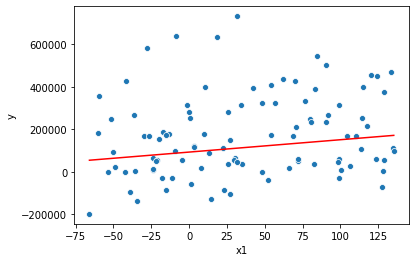

In [42]:
x_1 = X[:,0]
sns.scatterplot(x_1, y)

plt.plot(np.array([x_1.min(), x_1.max()]), preds[[x_1.argmin(), x_1.argmax()]], 'r-')
plt.xlabel('x1')
plt.ylabel('y')

plt.show()

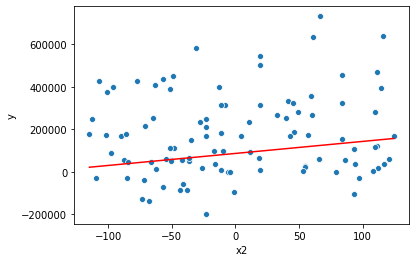

In [44]:
x_2 = X[:,1]
sns.scatterplot(x_2, y)

plt.plot(np.array([x_2.min(), x_2.max()]), preds[[x_2.argmin(), x_2.argmax()]], 'r-')
plt.xlabel('x2')
plt.ylabel('y')

plt.show()

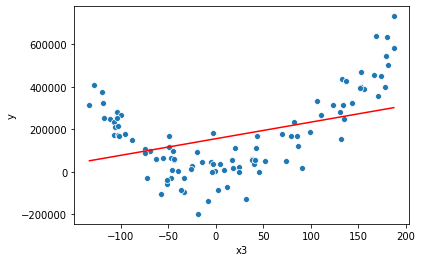

In [45]:
x_3 = X[:,2]
sns.scatterplot(x_3, y)

plt.plot(np.array([x_3.min(), x_3.max()]), preds[[x_3.argmin(), x_3.argmax()]], 'r-')
plt.xlabel('x3')
plt.ylabel('y')

plt.show()

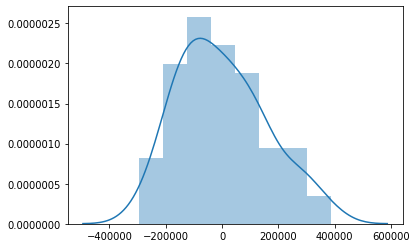

In [67]:
dy = y - preds
sns.distplot(dy);

In [68]:
_, p_value = stats.shapiro(dy)
if p_value>=0.05:
    print('Остатки имеют нормальное распределение, p_val =', p_value)
else:
    print('Остатки распределены не нормально, p_val =', p_value)

Остатки распределены не нормально, p_val = 0.031199295073747635


In [69]:
# видим, что остатки не имеют нормальное распределение, что означает, что модель плохо решает задачу

In [70]:
_, p_value = stats.ttest_1samp(dy, 0)
if p_value>=0.05:
    print('Систематическая ошибка отсутствует, p_val =', p_value)
else:
    print('Систематическая ошибка присутствует, p_val =', p_value)

Систематическая ошибка отсутствует, p_val = 0.9999999999999998


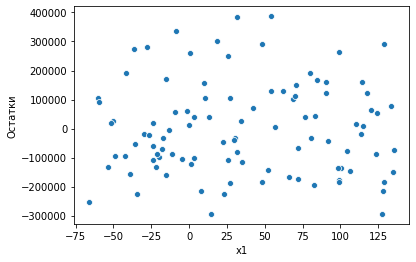

In [71]:
sns.scatterplot(x_1, dy)
plt.xlabel('x1')
plt.ylabel('Остатки')
plt.show()

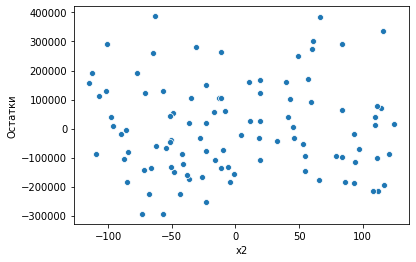

In [72]:
sns.scatterplot(x_2, dy)
plt.xlabel('x2')
plt.ylabel('Остатки')
plt.show()

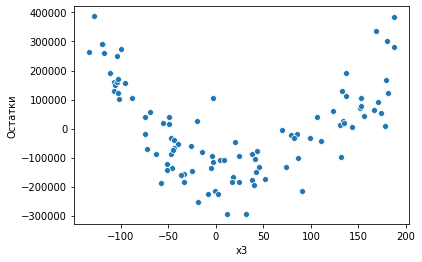

In [73]:
sns.scatterplot(x_3, dy)
plt.xlabel('x3')
plt.ylabel('Остатки')
plt.show()

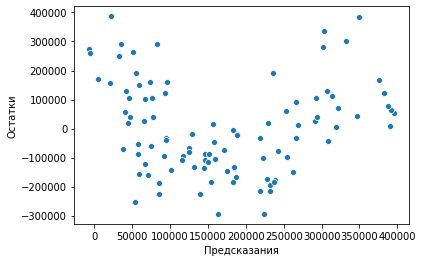

In [74]:
sns.scatterplot(preds, dy)
plt.xlabel('Предсказания')
plt.ylabel('Остатки')
plt.show()

In [80]:
def spearman(X,Y):
    n = X.shape[0]
    R_1 = stats.rankdata(X)
    R_2 = stats.rankdata(Y)
    R_1_mean = R_1.mean()
    R_2_mean = R_2.mean()
    sum_1 = 0
    for i in range(n):
        sum_1 += (R_1[i]-R_1_mean)*(R_2[i]-R_2_mean)
    sum_2 = 0
    sum_3 = 0
    for i in range(n):
        sum_2 += (R_1[i]-R_1_mean)**2
        sum_3 += (R_2[i]-R_2_mean)**2
    r = sum_1/np.sqrt(sum_2*sum_3)
    T = np.sqrt(n-2)*r / np.sqrt(1-r**2)
    p_val = 2 * min(stats.t.cdf(T, n - 2), 1 - stats.t.cdf(T, n - 2))
    return T, p_val

In [85]:
_, p_value = spearman(x_1,dy)
if p_value>=0.05:
    print('Остатки и x1 независимы, p_val =', p_value)
else:
    print('Остатки и x1 зависимы, p_val =', p_value)

Остатки и x1 независимы, p_val = 0.9473722648783016


In [86]:
_, p_value = spearman(x_2,dy)
if p_value>=0.05:
    print('Остатки и x2 независимы, p_val =', p_value)
else:
    print('Остатки и x2 зависимы, p_val =', p_value)

Остатки и x2 независимы, p_val = 0.8721422686260343


In [87]:
_, p_value = spearman(x_3,dy)
if p_value>=0.05:
    print('Остатки и x3 независимы, p_val =', p_value)
else:
    print('Остатки и x3 зависимы, p_val =', p_value)

Остатки и x3 независимы, p_val = 0.5524318734104716


In [90]:
_, p_value = spearman(preds,dy)
if p_value>=0.05:
    print('Остатки и предсказания независимы, p_val =', p_value)
else:
    print('Остатки и предсказания зависимы, p_val =', p_value)

Остатки и предсказания независимы, p_val = 0.5894783018743857


In [ ]:
# Предикторы и остатки и предикторы и предсказания независимы

In [97]:
R_2 = 1 - (dy**2).sum() / ((y - y.mean()) **2 ).sum()
print('Коэффициент детерменации =', R_2)

Коэффициент детерменации = 0.3204316662383543


In [107]:
n = preds.shape[0]
p = 4 # учитываем байес
R_2_unshifted = 1 - (n - 1) / (n - p) * (dy**2).sum() / ((y - y.mean()) **2).sum()
print('Несмещенный коэффициент детерменации =', R_2_unshifted)

Несмещенный коэффициент детерменации = 0.2991951558083029
